In [17]:
import requests
import pandas as pd
from collections import defaultdict
import time
import plotly.express as px
from IPython.display import display, clear_output
import plotly.graph_objects as go

In [2]:
url = 'https://api.pro.coinbase.com'
symbol = 'BTC-USD'

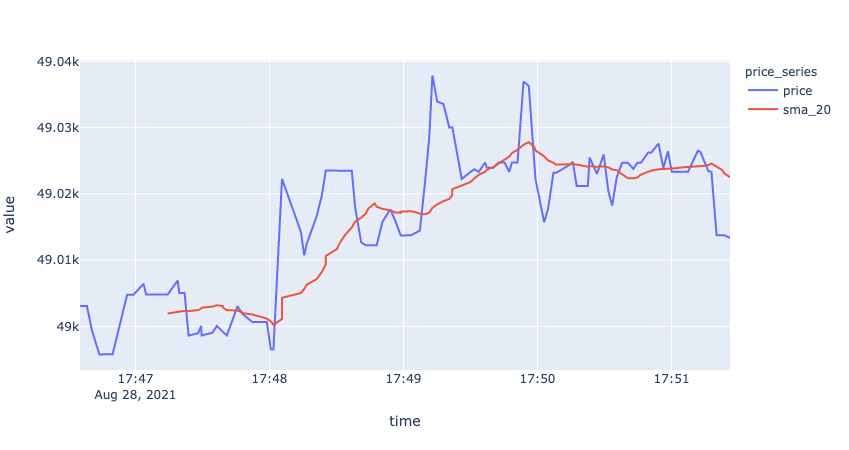

KeyboardInterrupt: 

In [16]:
btc = defaultdict(list)

while True:
    res = requests.get(f"{url}/products/{symbol}/ticker")
    btc['time'].append(res.json()['time'])
    btc['price'].append(float(res.json()['price']))
    btc_df = pd.DataFrame(btc)
    btc_df['sma_20'] = btc_df.price.rolling(20).mean()
    btc_melt = btc_df.melt(id_vars='time', var_name='price_series')
    fig = px.line(btc_melt, x='time', y='value', color='price_series')
    clear_output()
    display(fig)
    time.sleep(2)